In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz, freqs, sosfilt

### Задание 1
На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц.

Определите спектр сигнала с помощью стандартной функции быстрого преобразования Фурье.

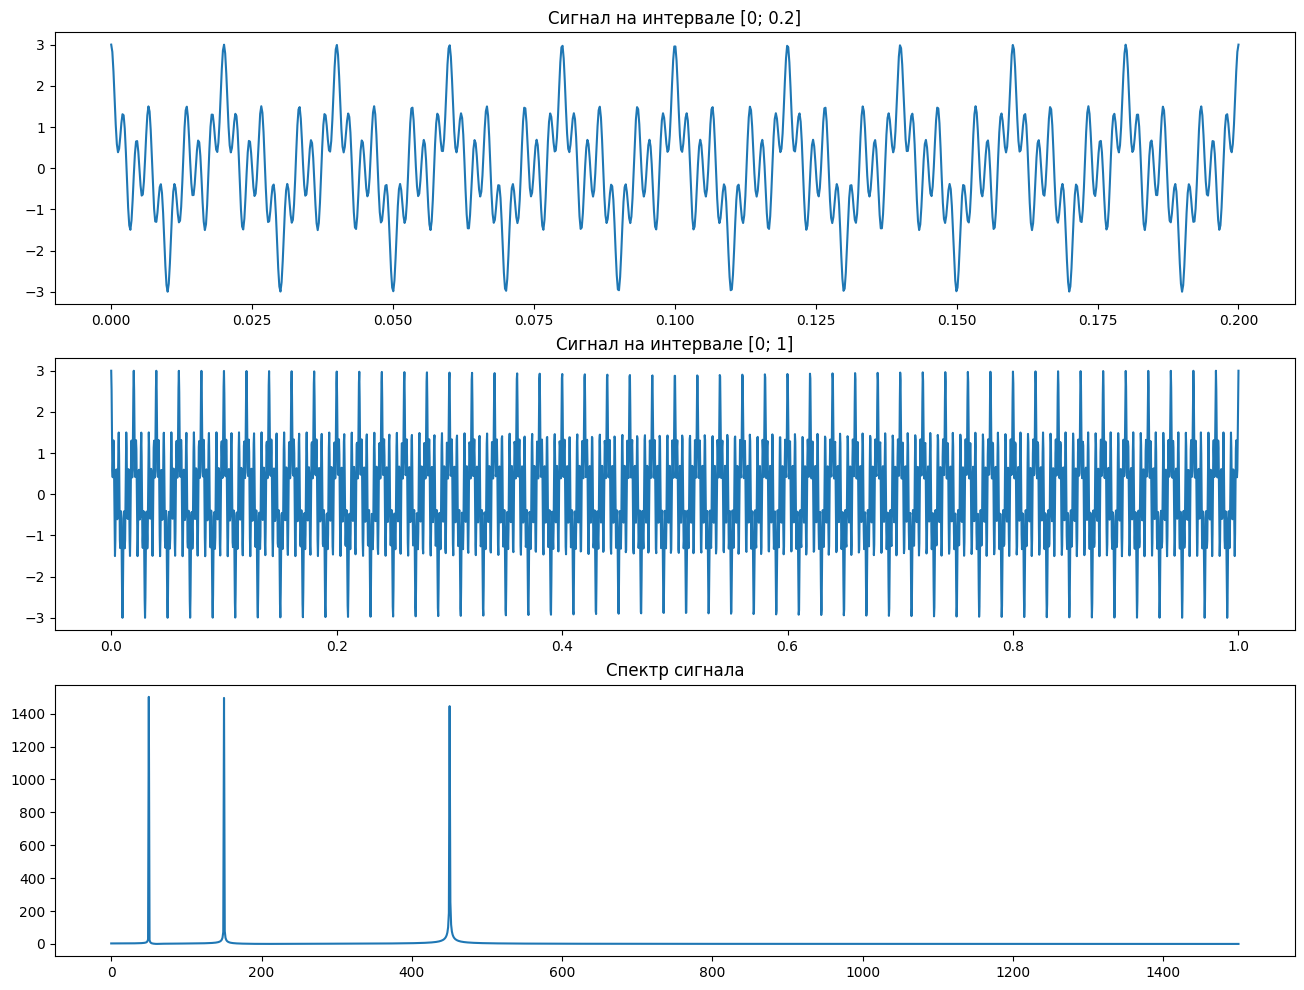

In [2]:
amp = 1
frequencies = [50, 150, 450]
omegas = [2 * np.pi * frequencies[i] for i in range(len(frequencies))]

def signal(t):
    return amp * (np.cos(t * omegas[0]) + np.cos(t * omegas[1]) + np.cos(t * omegas[2]))


x = np.linspace(0, 1, 3000)
x_freq = np.linspace(0, 1500, 1500)

y = signal(x)
y_fft = np.fft.fft(y)

plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, 0.2, 1000), signal(np.linspace(0, 0.2, 1000)))
plt.title("Сигнал на интервале [0; 0.2]")

plt.subplot(3, 1, 2)
plt.plot(x, y)
plt.title("Сигнал на интервале [0; 1]")

plt.subplot(3, 1, 3)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.title("Спектр сигнала")

plt.show()

### Задание 2
Реализовать алгоритм фильтра Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу из
пункта 1, убедиться, что происходит подавление высоких частот сигнала 150 и 450 Гц. При
моделировании ФНЧ воспользоваться формулой (32) из методички “Козулин Цифровая
обработка сигналов Python.pdf”. Частоту среза фильтра Баттерворта подберите самостоятельно. В
данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и спектр фильтра
Баттерворта. Убедитесь, что амплитуда исходного сигнала для частоты 50 Гц будет совпадать с
амплитудой отфильтрованного сигнала.

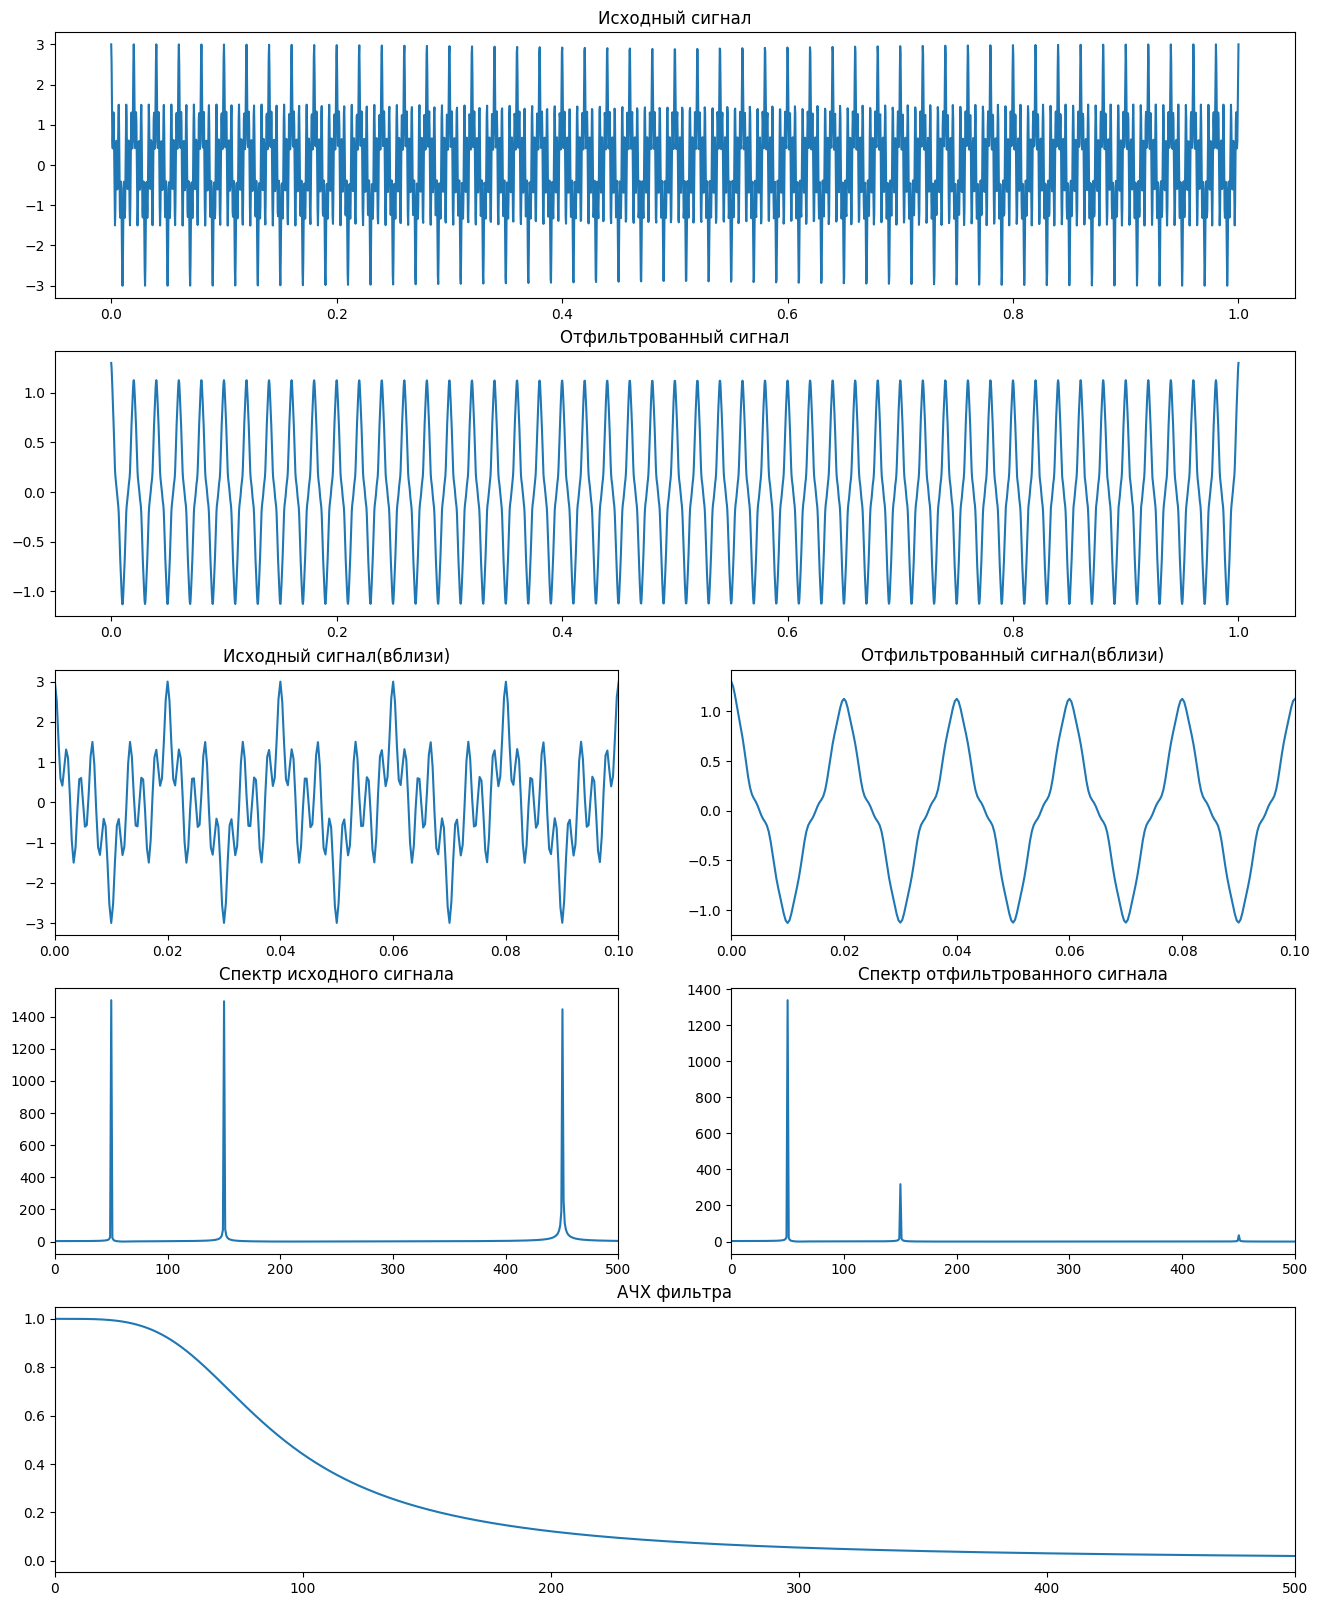

In [3]:
def butterworth_lowpass(signal_frequency, cutoff_frequency):
    omega = signal_frequency / cutoff_frequency
    transmission_coefficient = 1 / (-omega ** 2 + 1j * np.sqrt(2) * omega + 1)

    return transmission_coefficient


filter_coef = np.abs(butterworth_lowpass(np.fft.fftfreq(len(x), 1/3000), 70))
filtered_signal = np.fft.ifft(y_fft * filter_coef.real)

plt.figure(figsize=(16, 20))

plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(5, 1, 2)
plt.plot(x, filtered_signal.real)
plt.title("Отфильтрованный сигнал")

plt.subplot(5, 2, 5)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.title("Исходный сигнал(вблизи)")

plt.subplot(5, 2, 6)
plt.plot(x, filtered_signal.real)
plt.xlim(0, 0.1)
plt.title("Отфильтрованный сигнал(вблизи)")

plt.subplot(5, 2, 7)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 2, 8)
plt.plot(x_freq, np.abs((np.fft.fft(filtered_signal))[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.subplot(5, 1, 5)
plt.plot(x_freq, filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 500)
plt.title("АЧХ фильтра")

plt.show()


### Задание 3
Оставьте в сигнале только 50 Гц и 450 Гц.

На этот же график нанесите Ваш отфильтрованный сигнал.

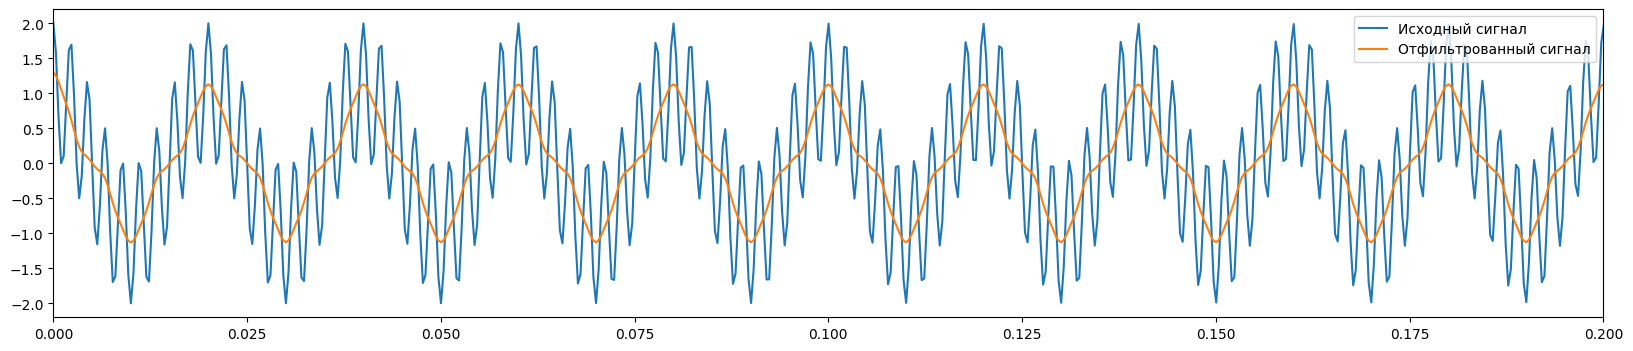

In [4]:
def signal2(t):
    return amp * (np.cos(t * omegas[0]) + np.cos(t * omegas[2]))


y2 = signal2(x)
y_fft2 = np.fft.fft(y2)

filter_coef = np.abs(butterworth_lowpass(np.fft.fftfreq(len(x), 1/3000), 70))
filtered_signal = np.fft.ifft(y_fft * filter_coef)

plt.figure(figsize=(20, 4))
plt.plot(x, y2, label='Исходный сигнал')
plt.plot(x, filtered_signal.real, label='Отфильтрованный сигнал')
plt.xlim(0, 0.2)
plt.legend(loc='upper right')
plt.show()

### Задание 4
Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит
подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35) из
методички “Козулин Цифровая обработка сигналов Python.pdf”.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
ФВЧ.

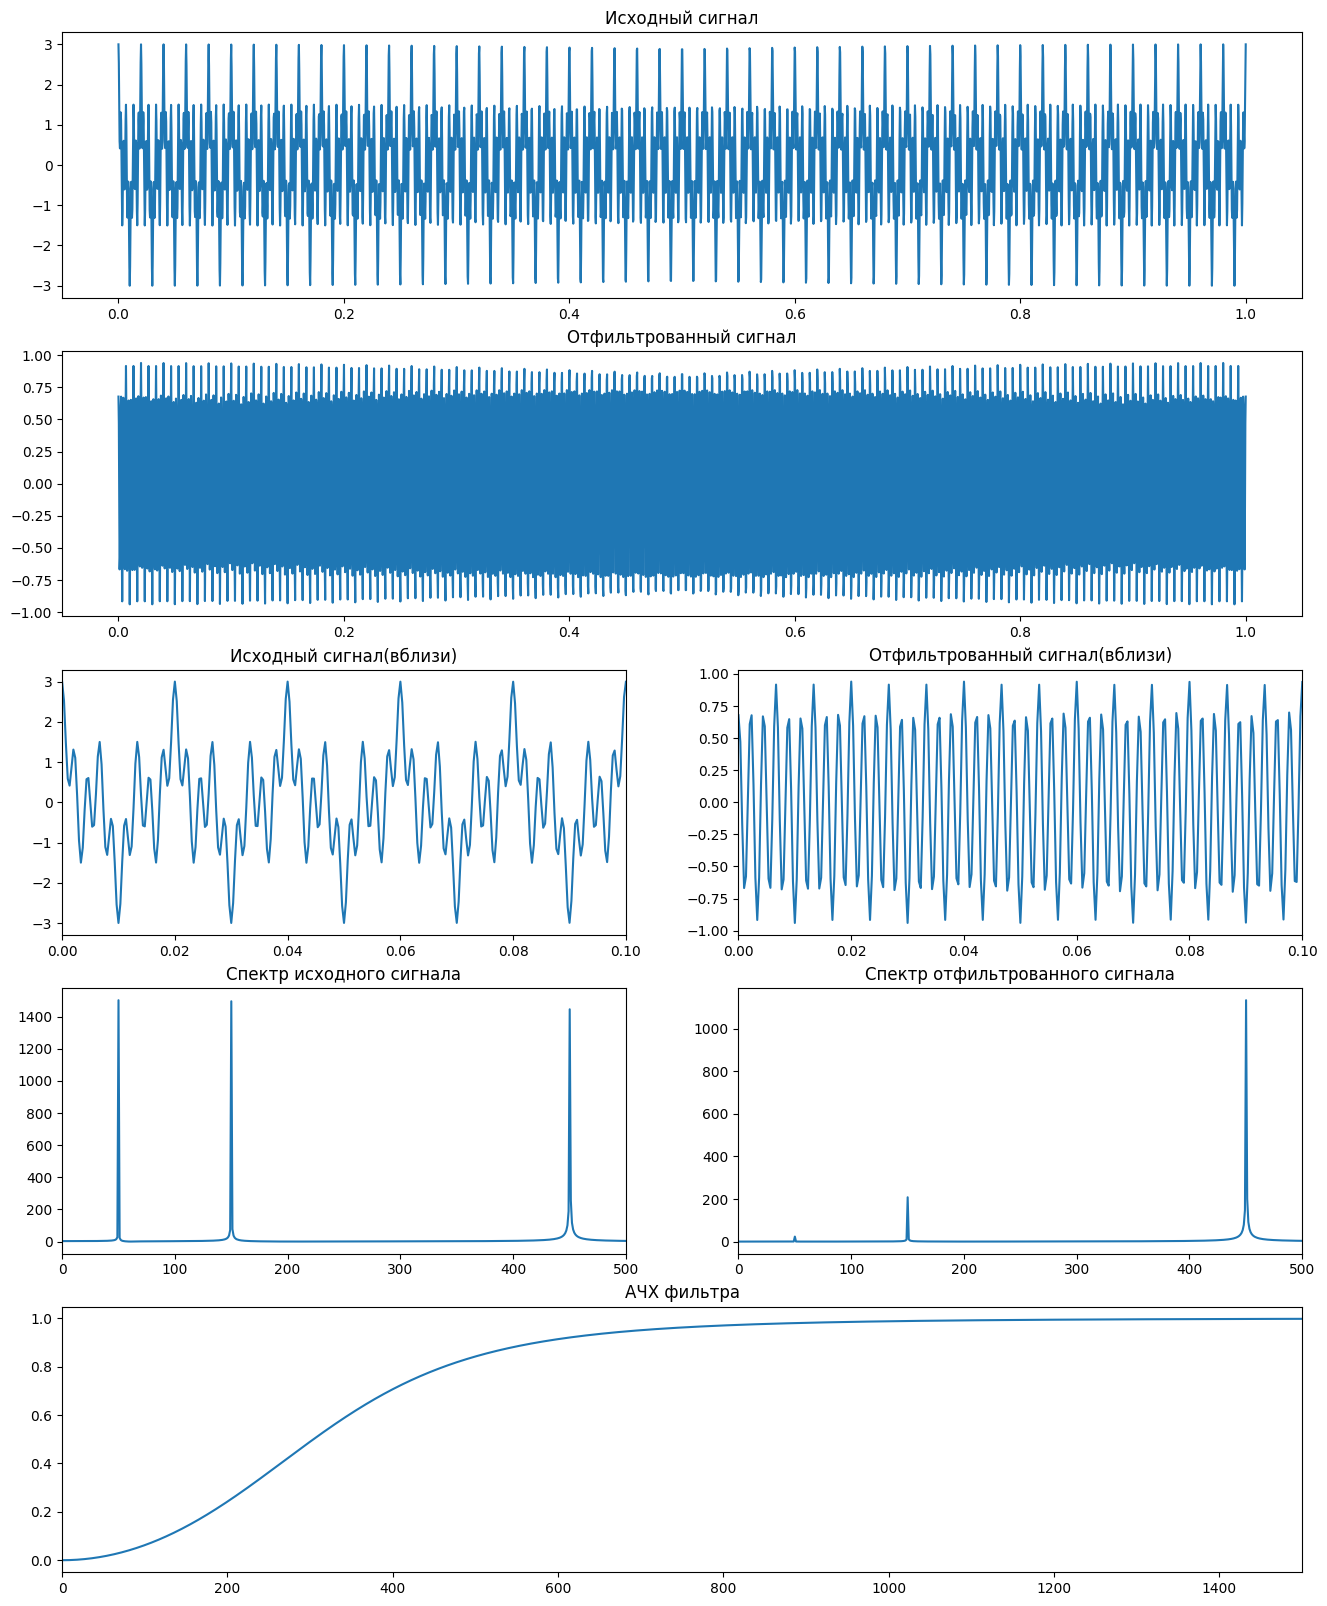

In [5]:
def butterworth_highpass(signal_frequency, cutoff_frequency):
    omega = cutoff_frequency / (signal_frequency + 0.000001)
    transmission_coefficient = 1 / (-(omega**2) + 1j * np.sqrt(2) * omega + 1)
    
    return transmission_coefficient


filter_coef = np.abs(butterworth_highpass(np.fft.fftfreq(len(x), 1/3000), 400))
filtered_signal = np.fft.ifft(y_fft * filter_coef.real)

plt.figure(figsize=(16, 20))

plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(5, 1, 2)
plt.plot(x, filtered_signal.real)
plt.title("Отфильтрованный сигнал")

plt.subplot(5, 2, 5)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.title("Исходный сигнал(вблизи)")

plt.subplot(5, 2, 6)
plt.plot(x, filtered_signal.real)
plt.xlim(0, 0.1)
plt.title("Отфильтрованный сигнал(вблизи)")

plt.subplot(5, 2, 7)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 2, 8)
plt.plot(x_freq, np.abs((np.fft.fft(filtered_signal))[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.subplot(5, 1, 5)
plt.plot(x_freq, filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 1500)
plt.title("АЧХ фильтра")

plt.show()

### Задание 5
Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту
150Гц. При моделировании использовать формулы (36) и (37).

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров
ПФ/ЗФ.

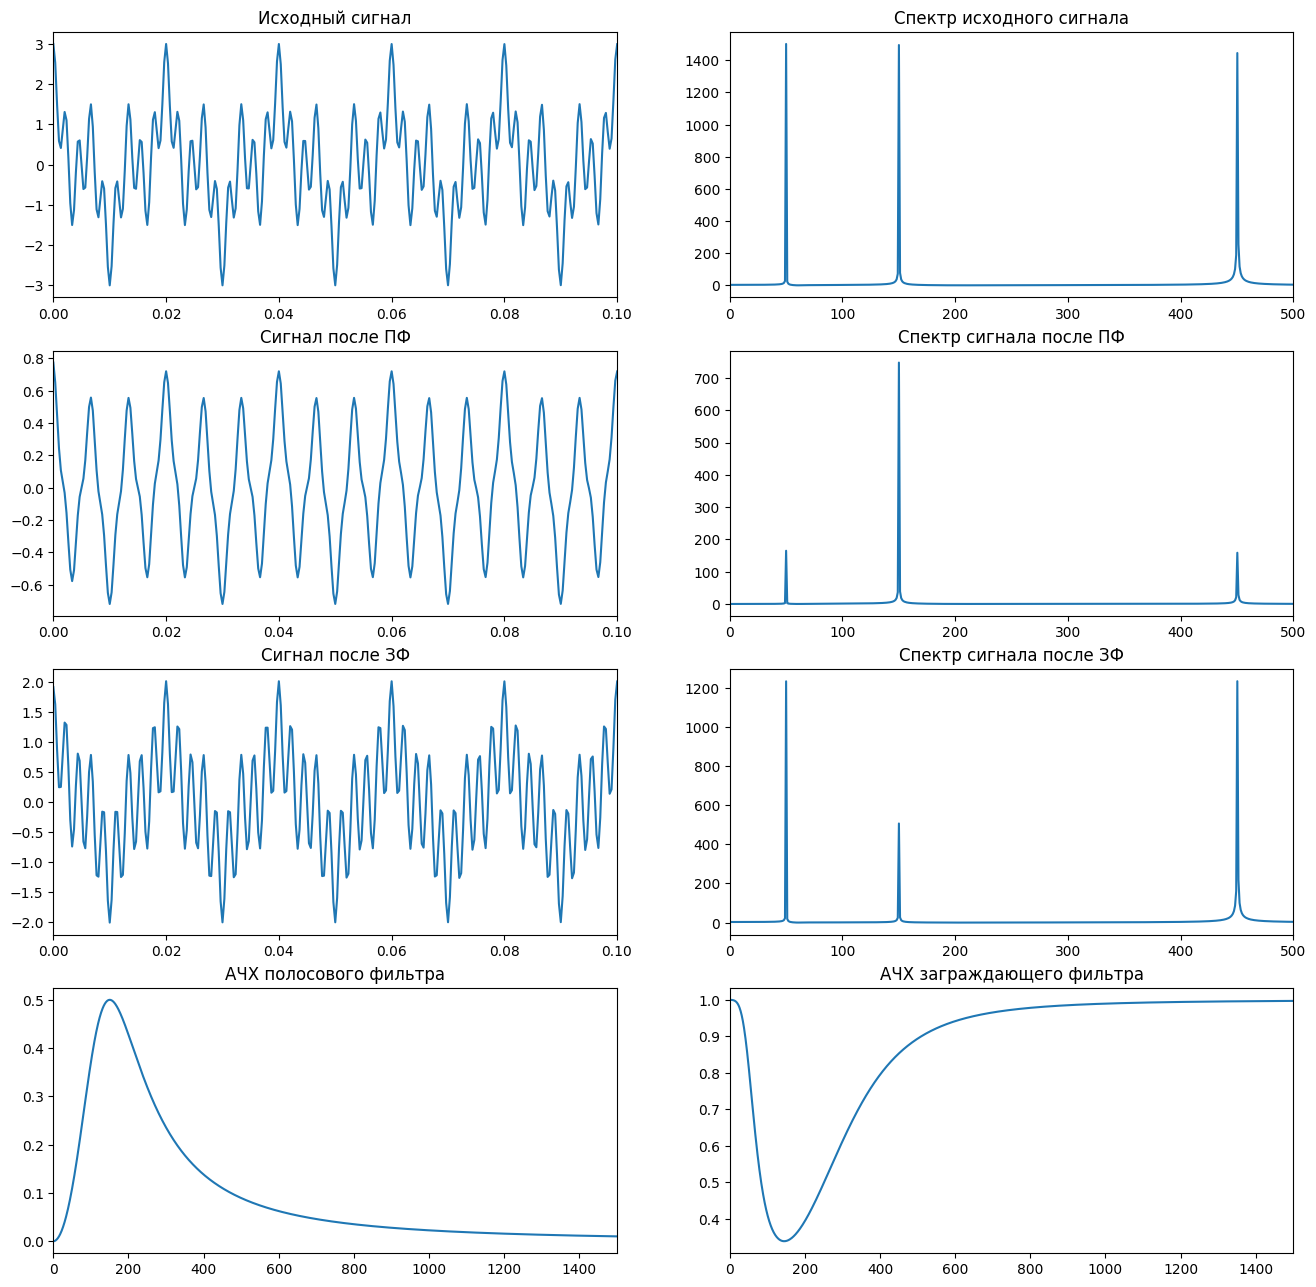

In [6]:
def bandpass_filter(signal_frequency, cutoff_frequency):
    omega_1 = signal_frequency / cutoff_frequency
    omega_2 = cutoff_frequency / (signal_frequency + 0.000001)
    
    transmission_coefficient = 1 / (-(omega_1**2) + 1j * np.sqrt(2) * omega_1 + 1)
    transmission_coefficient *= 1 / (-(omega_2**2) + 1j * np.sqrt(2) * omega_2 + 1)
    
    # return butterworth_lowpass(signal_frequency, cutoff_frequency) * butterworth_highpass(signal_frequency, cutoff_frequency)
    return transmission_coefficient
    
    
def blocking_filter(signal_frequency, cutoff_frequency):
    omega_1 = signal_frequency / (cutoff_frequency - 90)
    omega_2 = (cutoff_frequency + 200) / (signal_frequency + 0.000001)
    
    transmission_coefficient = 1 / (-(omega_1**2) + 1j * np.sqrt(2) * omega_1 + 1)
    transmission_coefficient += 1 / (-(omega_2**2) + 1j * np.sqrt(2) * omega_2 + 1)
    
    # return butterworth_lowpass(signal_frequency, cutoff_frequency) + butterworth_highpass(signal_frequency, cutoff_frequency)
    return transmission_coefficient


bandpass_filter_coef = np.abs(bandpass_filter(np.fft.fftfreq(len(x), 1/3000), 150))
bandpass_filtered_signal = np.fft.ifft(y_fft * bandpass_filter_coef.real)

blocking_filter_coef = np.abs(blocking_filter(np.fft.fftfreq(len(x), 1/3000), 150))
blocking_filtered_signal = np.fft.ifft(y_fft * blocking_filter_coef.real)

plt.figure(figsize=(16, 20))

plt.subplot(5, 2, 1)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.title("Исходный сигнал")

plt.subplot(5, 2, 2)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 2, 3)
plt.plot(x, bandpass_filtered_signal.real)
plt.xlim(0, 0.1)
plt.title("Сигнал после ПФ")

plt.subplot(5, 2, 4)
plt.plot(x_freq, np.abs((np.fft.fft(bandpass_filtered_signal))[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр сигнала после ПФ")

plt.subplot(5, 2, 5)
plt.plot(x, blocking_filtered_signal.real)
plt.xlim(0, 0.1)
plt.title("Сигнал после ЗФ")

plt.subplot(5, 2, 6)
plt.plot(x_freq, np.abs((np.fft.fft(blocking_filtered_signal))[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр сигнала после ЗФ")

plt.subplot(5, 2, 7)
plt.plot(x_freq, bandpass_filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 1500)
plt.title("АЧХ полосового фильтра")

plt.subplot(5, 2, 8)
plt.plot(x_freq, blocking_filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 1500)
plt.title("АЧХ заграждающего фильтра")

plt.show()

### Задание 6
Согласно формулам (28, 29) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 4-го и 5-го порядка с автоматическим определением
полюсов фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворта 5-го
порядка.

примеч.: Полюсы передаточной функции обладают симметрией, а именно их число и
конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически
реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.

In [7]:
def butterworth(signal_frequency, cutoff_frequency, n):
    s = signal_frequency / cutoff_frequency
    poles = list(filter(lambda x: x.real < 0, np.roots([1] + [0] * (2 * n - 1) + [(-1)**n])))
    
    transmission_coefficient = np.sqrt(1 + s ** (2 * n))
        
    return poles, 1 / transmission_coefficient


poles_4, filter_coef_4 = butterworth(np.fft.fftfreq(len(x), 1/3000), 200, 4)
poles_5, filter_coef_5 = butterworth(np.fft.fftfreq(len(x), 1/3000), 200, 5)

print("Полюса фильтра 4-го порядка:\n", poles_4)
print("\nПолюса фильтра 5-го порядка:\n", poles_5)

Полюса фильтра 4-го порядка:
 [np.complex128(-0.9238795325112865+0.38268343236509j), np.complex128(-0.9238795325112865-0.38268343236509j), np.complex128(-0.38268343236509006+0.9238795325112867j), np.complex128(-0.38268343236509006-0.9238795325112867j)]

Полюса фильтра 5-го порядка:
 [np.complex128(-1.0000000000000009+0j), np.complex128(-0.8090169943749475+0.5877852522924729j), np.complex128(-0.8090169943749475-0.5877852522924729j), np.complex128(-0.3090169943749471+0.9510565162951526j), np.complex128(-0.3090169943749471-0.9510565162951526j)]


### Задание 7
Сравните реализованный Вами фильтр 5-го порядка с фильтром 2-го порядка, объясните
разницу.

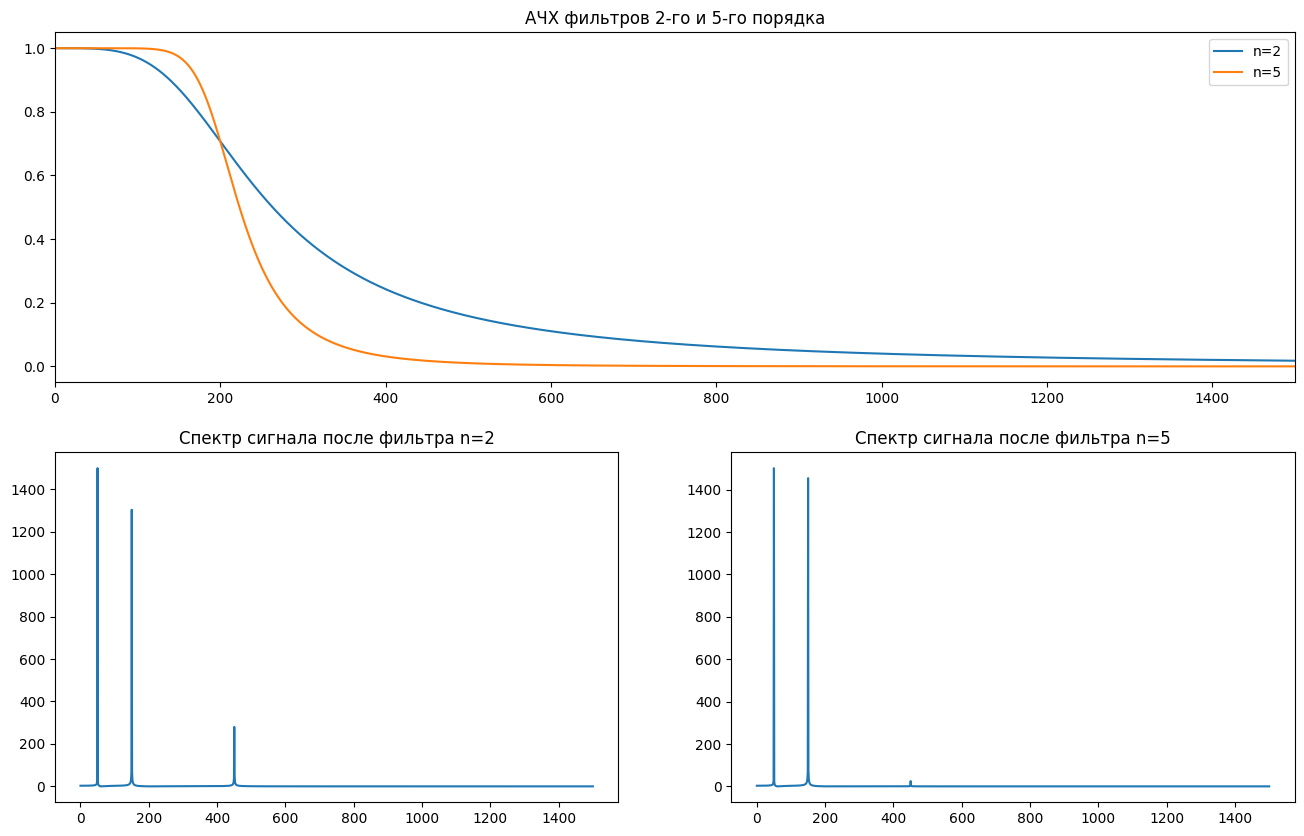

In [8]:
filter_coef = np.abs(butterworth_lowpass(np.fft.fftfreq(len(x), 1/3000), 200))
poles_2, filter_coef_2 = butterworth(np.fft.fftfreq(len(x), 1/3000), 200, 2)

filtered_signal_2 = np.fft.ifft(y_fft * filter_coef.real)
filtered_signal_5 = np.fft.ifft(y_fft * filter_coef_5.real)

plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(x_freq, filter_coef.real[:len(y_fft)//2], label='n=2')
plt.plot(x_freq, filter_coef_5.real[:len(y_fft)//2], label='n=5')
# plt.plot(x_freq, filter_coef_2.real[:len(y_fft)//2], label='n=2, v2')
plt.xlim(0, 1500)
plt.legend()
plt.title("АЧХ фильтров 2-го и 5-го порядка")

plt.subplot(2, 2, 3)
plt.plot(x_freq, np.abs((np.fft.fft(filtered_signal_2))[:len(y_fft)//2]))
plt.title("Спектр сигнала после фильтра n=2")

plt.subplot(2, 2, 4)
plt.plot(x_freq, np.abs((np.fft.fft(filtered_signal_5))[:len(y_fft)//2]))
plt.title("Спектр сигнала после фильтра n=5")

plt.show()

### Задание 8
Сравните Ваш алгоритм ФНЧ Баттерворта 5-го порядка с встроенным фильтром
Баттерворта библиотеки scipy.signal также для 5-го порядка используя.

0.002350330352783203
0.0017354488372802734


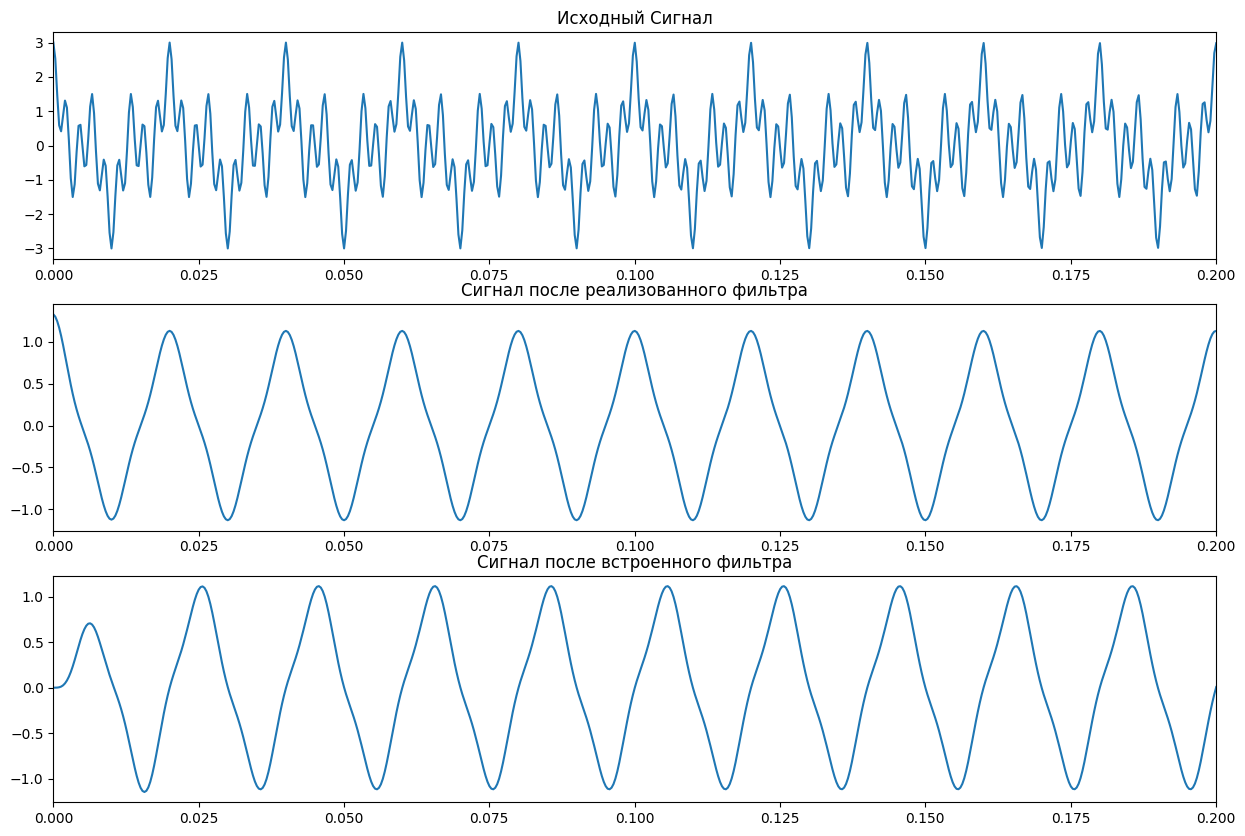

In [9]:
start_1 = time.time()
poles, my_filter_coef = butterworth(np.fft.fftfreq(len(x), 1/3000), 100, 5)
my_filtered_signal = np.fft.ifft(y_fft * my_filter_coef.real)
end_1 = time.time()

start_2 = time.time()
sos = butter(5, 100, 'lp', fs=3000, output='sos')
filtered = sosfilt(sos, y)
end_2 = time.time()

print(end_1 - start_1)
print(end_2 - start_2)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.title("Исходный Сигнал")
plt.xlim(0, 0.2)

plt.subplot(3, 1, 2)
plt.plot(x, my_filtered_signal.real)
plt.title("Сигнал после реализованного фильтра")
plt.xlim(0, 0.2)

plt.subplot(3, 1, 3)
plt.plot(x, filtered)
plt.title("Сигнал после встроенного фильтра")
plt.xlim(0, 0.2)

plt.show()

### Задание 9
Добавить шум к исходному сигналу, посмотрите как происходит фильтрация для
зашумленного сигнала.

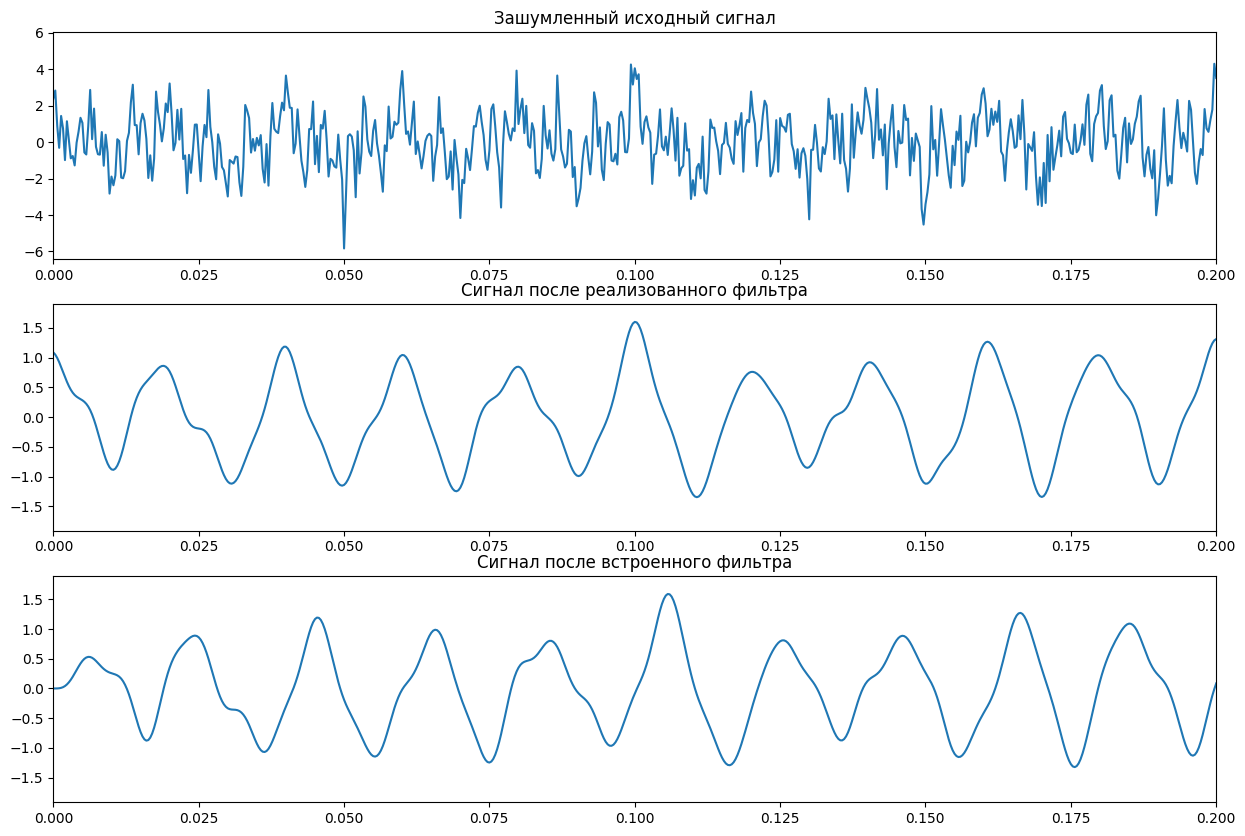

In [10]:
def signal_noised(t):
    return amp * (np.cos(t * omegas[0]) + np.cos(t * omegas[1]) + np.cos(t * omegas[2])) + np.random.normal(0, 1, t.shape)


y_noised = signal_noised(x)
y_noised_fft = np.fft.fft(y_noised)

poles, my_filter_coef = butterworth(np.fft.fftfreq(len(x), 1/3000), 100, 5)
my_filtered_signal = np.fft.ifft(y_noised_fft * my_filter_coef.real)

sos = butter(5, 100, 'lp', fs=3000, output='sos')
filtered = sosfilt(sos, y_noised)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x, y_noised)
plt.title("Зашумленный исходный сигнал")
plt.xlim(0, 0.2)

plt.subplot(3, 1, 2)
plt.plot(x, my_filtered_signal.real)
plt.title("Сигнал после реализованного фильтра")
plt.xlim(0, 0.2)

plt.subplot(3, 1, 3)
plt.plot(x, filtered)
plt.title("Сигнал после встроенного фильтра")
plt.xlim(0, 0.2)

plt.show()

### Задание 10
Реализуйте фильтр ФНЧ Чебышева 1-го рода N порядка.

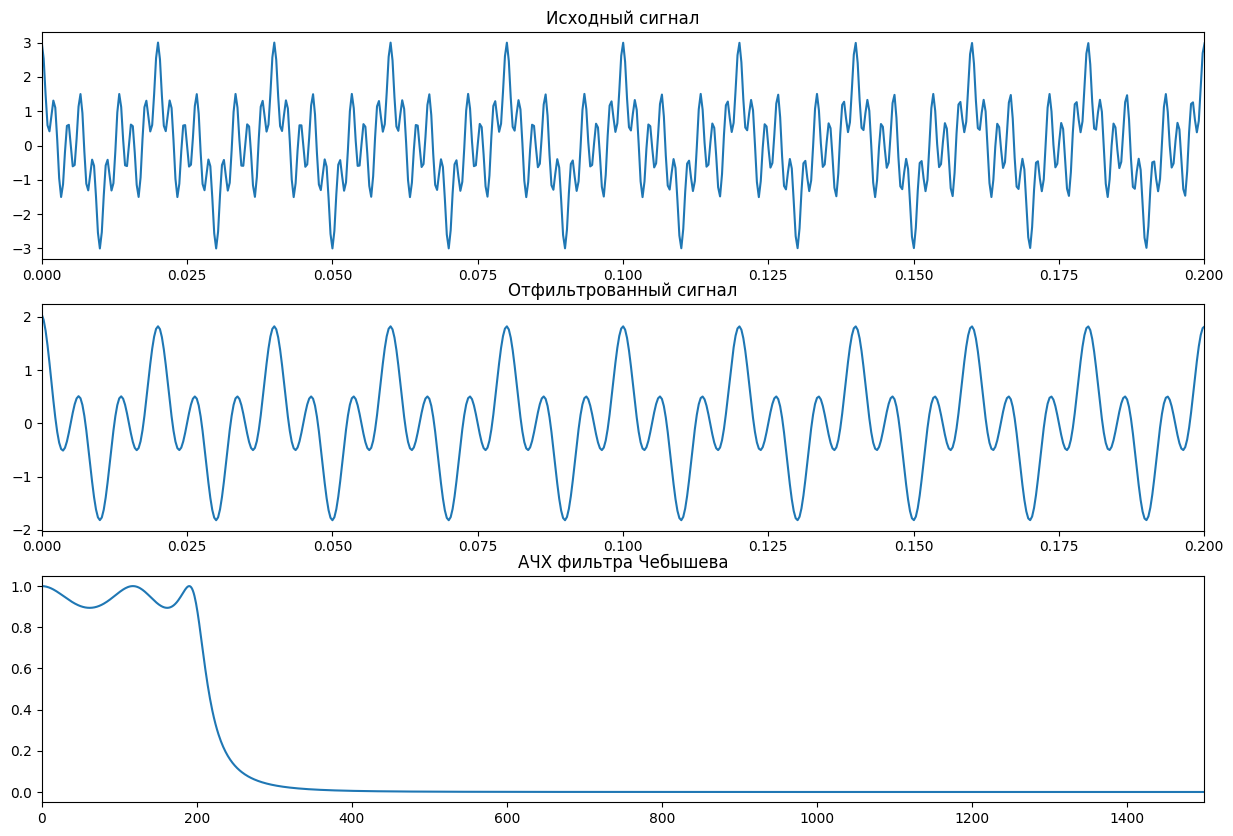

In [11]:
def chebyshev_polynomial(n, x):
    if n == 0:
        return 1
    if n == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(n - 1, x) - chebyshev_polynomial(n - 2, x)
    
    
def chebyshev_lowpass(signal_frequency, cutoff_frequency, n, epsilon):
    omega = signal_frequency / cutoff_frequency
    return 1 / np.sqrt(1 + (epsilon**2) * (chebyshev_polynomial(n, omega)**2))


filter_coef = np.abs(chebyshev_lowpass(np.fft.fftfreq(len(x), 1/3000), 200, 5, 0.5))
filtered_signal = np.fft.ifft(y_fft * filter_coef.real)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.xlim(0, 0.2)
plt.title("Исходный сигнал")

plt.subplot(3, 1, 2)
plt.plot(x, filtered_signal.real)
plt.xlim(0, 0.2)
plt.title("Отфильтрованный сигнал")

plt.subplot(3, 1, 3)
plt.plot(x_freq, filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 1500)
plt.title("АЧХ фильтра Чебышева")

plt.show()